## TASK 2 OASIS


In [13]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/user pc/Downloads/TASK 2 NEW YORK CITY FILE/AB_NYC_2019.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(None,
      id                                              name  host_id  \
 0  2539                Clean & quiet apt home by the park     2787   
 1  2595                             Skylit Midtown Castle     2845   
 2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
 3  3831                   Cozy Entire Floor of Brownstone     4869   
 4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
 
      host_name neighbourhood_group neighbourhood  latitude  longitude  \
 0         John            Brooklyn    Kensington  40.64749  -73.97237   
 1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
 2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
 3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
 4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
 
          room_type  price  minimum_nights  number_of_reviews last_review  \
 0     Private room    149               1

## Initial Observations from the Dataset:
* The dataset contains 48,895 rows and 16 columns.
* There are some missing values:
* name (16 missing)
* host_name (21 missing)
* last_review (10,052 missing)
* reviews_per_month (10,052 missing)
* last_review is stored as an object (string) and should be converted to a datetime format.
* reviews_per_month has missing values, which likely correspond to listings with zero reviews.
* There might be duplicates, which need to be checked.
* Price values should be examined for outliers (e.g., extremely high prices).

## Next Steps for Data Cleaning:
* Handle Missing Values
* Fill reviews_per_month with 0 where missing.
* Drop rows with missing name or host_name as these are important identifiers.
* Convert last_review to a datetime format.
* Check and Remove Duplicates
* Standardize Data Formatting
* Ensure uniform formatting for categorical fields (room_type, neighbourhood_group).
* Identify and Handle Outliers
* Examine price values for extreme numbers.

In [14]:
# Step 1: Handling missing values
df['reviews_per_month'].fillna(0, inplace=True)  # Fill missing reviews_per_month with 0
df.dropna(subset=['name', 'host_name'], inplace=True)  # Drop rows with missing name or host_name
df['last_review'] = pd.to_datetime(df['last_review'])  # Convert last_review to datetime

# Step 2: Checking and removing duplicates
df.drop_duplicates(inplace=True) #Remove duplicates
df.drop_duplicates(subset=['name', 'host_id', 'latitude', 'longitude'], inplace=True)  # Remove near-duplicates

# Step 3: Standardizing categorical data (ensuring proper formatting)
df['room_type'] = df['room_type'].str.strip().str.lower()  # Convert to lowercase and remove extra spaces
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip().str.lower()

# Step 4: Identifying and handling outliers in price
# Checking price distribution
price_summary = df['price'].describe()

# Step 5:Setting an upper limit for price outliers (removing extreme values)
upper_limit = price_summary['75%'] + 1.5 * (price_summary['75%'] - price_summary['25%'])
df_cleaned = df[df['price'] <= upper_limit]
df = df[df['price'] > 0]  # Remove listings with zero or negative prices
df_cleaned = df[df['price'] <= upper_limit]

# Step 6: Checking for invalid latitude/longitude values (valid NYC range)
df_cleaned = df_cleaned[(df_cleaned['latitude'].between(40.4774, 40.9176)) &
                         (df_cleaned['longitude'].between(-74.2591, -73.7004))]

# Step 7: Ensuring correct data types
df_cleaned['id'] = df_cleaned['id'].astype(int)
df_cleaned['host_id'] = df_cleaned['host_id'].astype(int)


C:\Users\user pc\AppData\Local\Temp\ipykernel_536\2100642121.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)  # Fill missing reviews_per_month with 0


In [15]:
# Setting an upper limit for price outliers (removing extreme values)
#upper_limit = price_summary['75%'] + 1.5 * (price_summary['75%'] - price_summary['25%'])
#df_cleaned = df[df['price'] <= upper_limit]

In [16]:
# Display summary of cleaned data
df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 45876 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              45876 non-null  int64         
 1   name                            45876 non-null  object        
 2   host_id                         45876 non-null  int64         
 3   host_name                       45876 non-null  object        
 4   neighbourhood_group             45876 non-null  object        
 5   neighbourhood                   45876 non-null  object        
 6   latitude                        45876 non-null  float64       
 7   longitude                       45876 non-null  float64       
 8   room_type                       45876 non-null  object        
 9   price                           45876 non-null  int64         
 10  minimum_nights                  45876 non-null  int64         
 11  number_

(None,
      id                                              name  host_id  \
 0  2539                Clean & quiet apt home by the park     2787   
 1  2595                             Skylit Midtown Castle     2845   
 2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
 3  3831                   Cozy Entire Floor of Brownstone     4869   
 4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
 
      host_name neighbourhood_group neighbourhood  latitude  longitude  \
 0         John            brooklyn    Kensington  40.64749  -73.97237   
 1     Jennifer           manhattan       Midtown  40.75362  -73.98377   
 2    Elisabeth           manhattan        Harlem  40.80902  -73.94190   
 3  LisaRoxanne            brooklyn  Clinton Hill  40.68514  -73.95976   
 4        Laura           manhattan   East Harlem  40.79851  -73.94399   
 
          room_type  price  minimum_nights  number_of_reviews last_review  \
 0     private room    149               1

#  Data Cleaning Summary:
* Removed missing values from name and host_name.
* Filled missing values in reviews_per_month with 0.
* Converted last_review to datetime format.
* Removed duplicate records.
* Standardized categorical columns (room_type, neighbourhood_group).
* Removed outliers in price based on interquartile range (IQR), reducing the dataset to 45,876 entries.

In [17]:
# Display summary of cleaned data
print("\nCleaned Dataset Info:")
df_cleaned.info()
print("\nFirst  Rows of Cleaned Data:")
print(df_cleaned.head())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 45876 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              45876 non-null  int64         
 1   name                            45876 non-null  object        
 2   host_id                         45876 non-null  int64         
 3   host_name                       45876 non-null  object        
 4   neighbourhood_group             45876 non-null  object        
 5   neighbourhood                   45876 non-null  object        
 6   latitude                        45876 non-null  float64       
 7   longitude                       45876 non-null  float64       
 8   room_type                       45876 non-null  object        
 9   price                           45876 non-null  int64         
 10  minimum_nights                  45876 non-null  int6

In [18]:
#df_cleaned.to_csv("C:/VS Code New/OASIS/Task_2/AB_NYC_2019_CLEANED.csv", index=False)


## Data Visualization after Cleaning data set 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the cleaned dataset
file_path = "AB_NYC_2019_CLEANED.csv"  # Update path if necessary
df_cleaned = pd.read_csv(file_path)

# Display basic info
print("Cleaned Dataset Info:")
df_cleaned.info()
print("\nFirst 5 Rows:")
print(df_cleaned.head())

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45876 entries, 0 to 45875
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45876 non-null  int64  
 1   name                            45876 non-null  object 
 2   host_id                         45876 non-null  int64  
 3   host_name                       45876 non-null  object 
 4   neighbourhood_group             45876 non-null  object 
 5   neighbourhood                   45876 non-null  object 
 6   latitude                        45876 non-null  float64
 7   longitude                       45876 non-null  float64
 8   room_type                       45876 non-null  object 
 9   price                           45876 non-null  int64  
 10  minimum_nights                  45876 non-null  int64  
 11  number_of_reviews               45876 non-null  int64  
 12  last_revie

## Visualization 1: Distribution of Price
This histogram shows the distribution of Airbnb prices in NYC. 
It helps in understanding the pricing trends and identifying outliers.

---


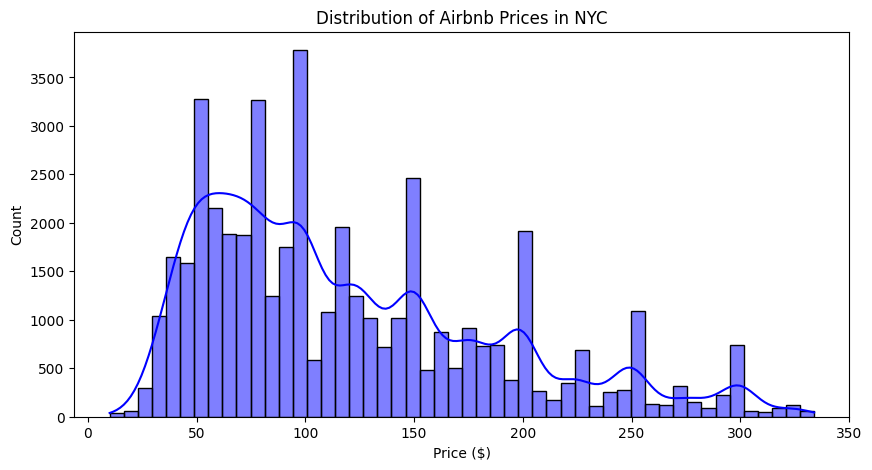

In [21]:
# Visualization 1: Distribution of Price
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['price'], bins=50, kde=True, color='blue')
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Distribution of Airbnb Prices in NYC")
plt.show()

## Summary 1 :
 Most listings are within a reasonable price range, but some luxury stays drive up the outliers.

## Visualization 2: Room Type Distribution
This bar chart represents the distribution of different room types in the dataset.
It helps to understand which type of listings are more common.

---


C:\Users\user pc\AppData\Local\Temp\ipykernel_536\3939201409.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df_cleaned, palette='dark')


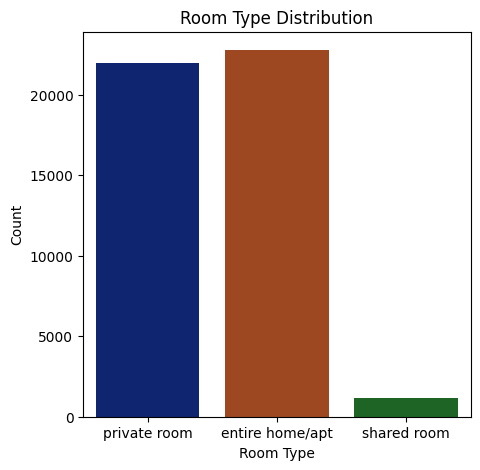

In [27]:
# Visualization 2: Room Type Distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='room_type', data=df_cleaned, palette='dark')
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.title("Room Type Distribution")
plt.show()

## Visualization 3: Listings per Neighborhood Group
This chart shows the number of listings in each neighborhood group, helping us identify areas with high Airbnb activity.

---


C:\Users\user pc\AppData\Local\Temp\ipykernel_536\800195956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='neighbourhood_group', data=df_cleaned, order=df_cleaned['neighbourhood_group'].value_counts().index, palette='viridis')


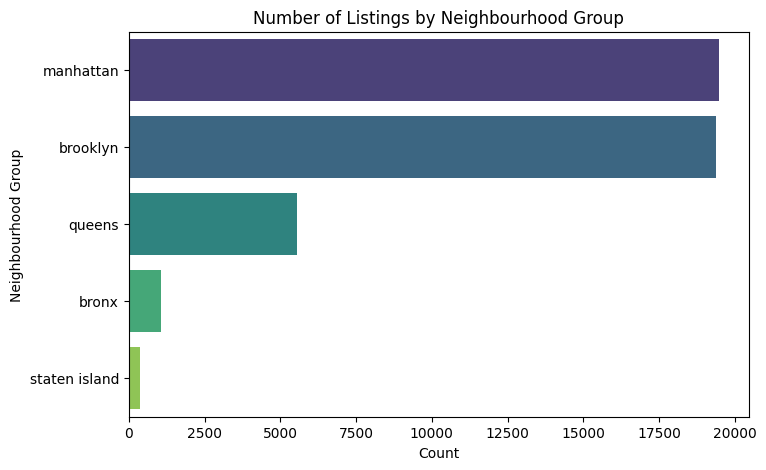

In [28]:
# Visualization 3: Listings per Neighborhood Group
plt.figure(figsize=(8, 5))
sns.countplot(y='neighbourhood_group', data=df_cleaned, order=df_cleaned['neighbourhood_group'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Neighbourhood Group")
plt.title("Number of Listings by Neighbourhood Group")
plt.show()

## Visualization 4: Price vs. Number of Reviews
A scatter plot to analyze the relationship between the price of a listing and the number of reviews it has.

---


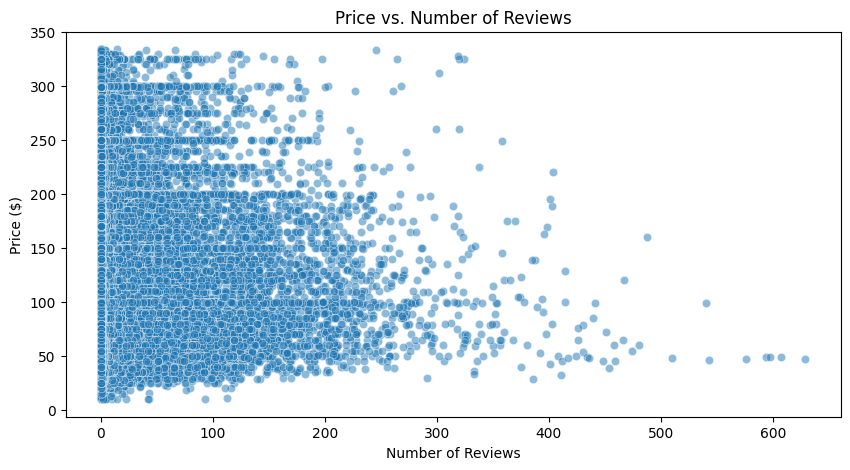


Visualizations generated successfully!


In [29]:
# Visualization 4: Price vs. Number of Reviews
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_cleaned['number_of_reviews'], y=df_cleaned['price'], alpha=0.5)
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.title("Price vs. Number of Reviews")
plt.show()

print("\nVisualizations generated successfully!")

##  Visualization 5: Distribution of Listing Availability
This histogram displays the distribution of listing availability in the dataset.
It helps us understand how frequently listings are available throughout the year.

---

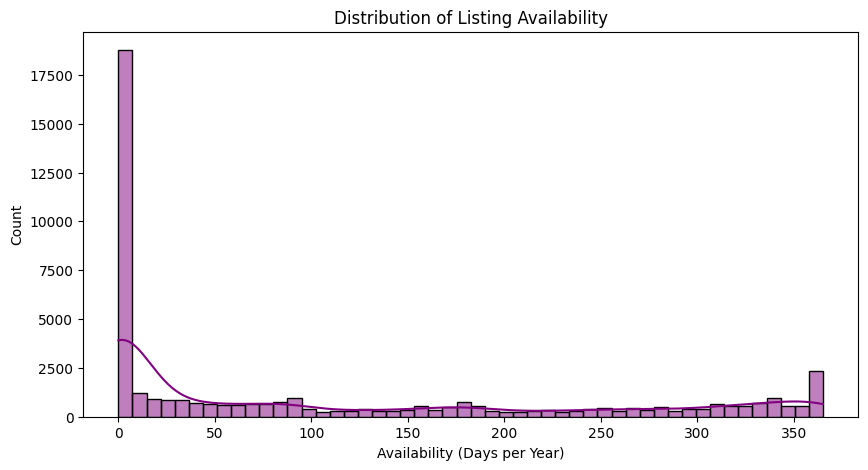

In [30]:
# Visualization 5: Distribution of Listing Availability
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['availability_365'], bins=50, kde=True, color='purple')
plt.xlabel("Availability (Days per Year)")
plt.ylabel("Count")
plt.title("Distribution of Listing Availability")
plt.show()

## Visualization 6: Top 10 Hosts by Number of Listings
This bar chart shows the hosts with the most listings in NYC.
It highlights which hosts dominate the Airbnb market in the city.

---

C:\Users\user pc\AppData\Local\Temp\ipykernel_536\923468310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.index, y=top_hosts.values, palette="magma")


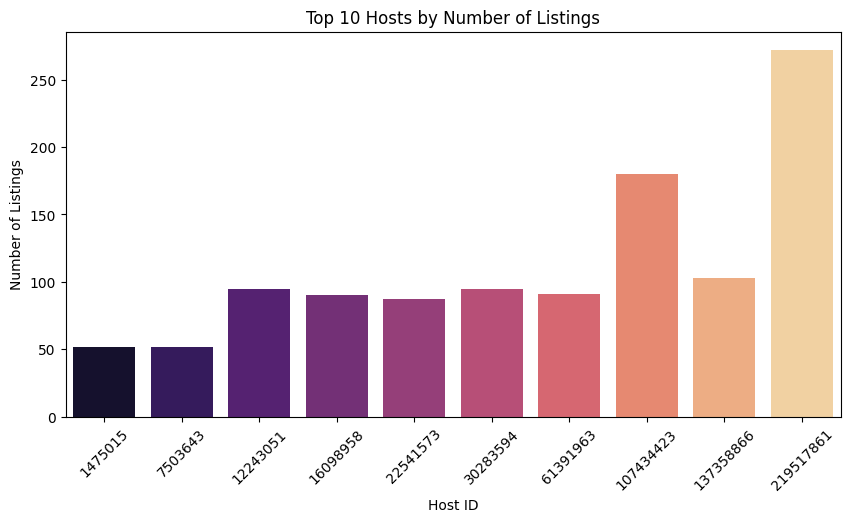

In [32]:
# Visualization 6: Top 10 Hosts by Number of Listings
top_hosts = df_cleaned['host_id'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette="magma")
plt.xlabel("Host ID")
plt.ylabel("Number of Listings")
plt.title("Top 10 Hosts by Number of Listings")
plt.xticks(rotation=45)
plt.show()


## Visualization 7: Price Distribution by Neighborhood
This boxplot displays the price variations among different neighborhood groups.
It helps in understanding price trends across different boroughs.

---

C:\Users\user pc\AppData\Local\Temp\ipykernel_536\2233416367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=df_cleaned, palette='muted')


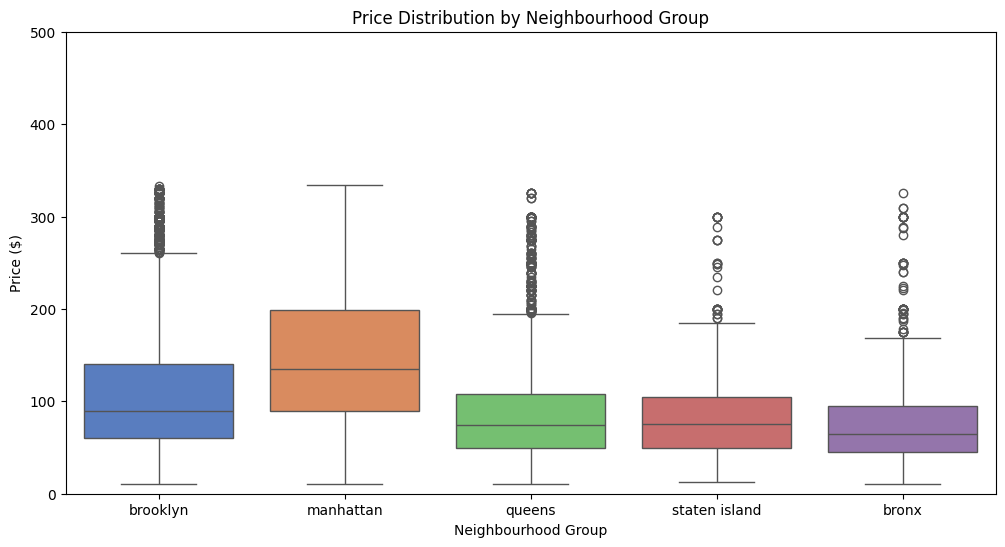

In [34]:

# Visualization 7: Price Distribution by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_cleaned, palette='muted')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price ($)")
plt.title("Price Distribution by Neighbourhood Group")
plt.ylim(0, 500)  # Limit extreme outliers for better visibility
plt.show()


## Visualization 8: Feature Correlation Heatmap
This heatmap visualizes the correlations between numerical features in the dataset.
It helps in understanding which factors might be related to each other.

---

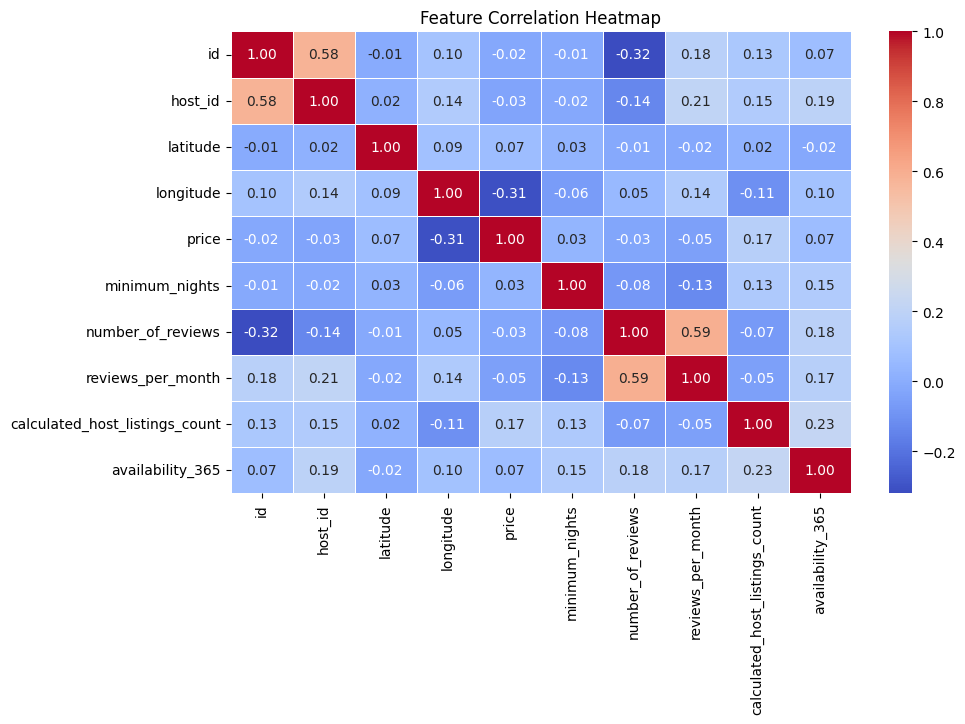

In [36]:
# Select only numerical columns
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Visualization 8: Feature Correlation Heatmap (Fixed)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
